In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [3]:
%matplotlib inline

# Problem 1

Let $u(x) = sin((x + \pi)^2 - 1)$. Use (1.3) - (1.6) to approximate $\frac{1}{2}
u'' − u'$ at the grid points where $a = 0$, $b = 1$, and $n = 10$. Graph the result.

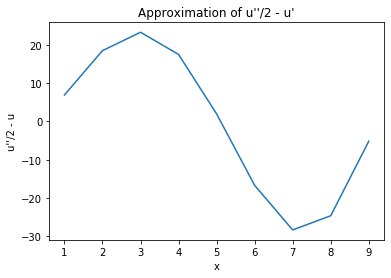

In [4]:
u = lambda x: np.sin((x+ np.pi)**2 - 1)

n = 10
h = 1/n
x = np.linspace(0,1,n+1)
ux = u(x)

# equation 5.4
tridiag_5_4 = -np.eye(n-1,n-1,k=-1) + np.eye(n-1,n-1,k=1)

# The tridaig neglects part of the endpoint calculations
endpoints = np.zeros(n-1)
endpoints[0] = -ux[0]/2/h
endpoints[-1] = ux[-1]/2/h

du = 1 / (2*h) * tridiag_5_4 @ ux[1:-1] + endpoints # ==> u'(x)

# equation 5.6
tridiag_5_6 = np.eye(n-1,n-1,k=-1) - 2*np.eye(n-1,n-1) + np.eye(n-1,n-1,k=1)

endpoints = np.zeros(n-1)
endpoints[0] = ux[0]/h**2
endpoints[-1] = ux[-1]/h**2

d2u = 1 / h**2 * tridiag_5_6 @ ux[1:-1] + endpoints # ==> u"(x)

plt.plot(np.arange(1,10,1),d2u/2 - du)
plt.title("Approximation of u''/2 - u'")
plt.xlabel("x")
plt.ylabel("u''/2 - u")
plt.show()


# Problem 2

Use equation (1.9) to solve the singularly perturbed BVP (1.7) with $\epsilon = 1/10, f(x) = -1, \alpha=1,$ and $\beta=3$ on a grid with $n=30$ subintervals. Graph the solution. This BVP is called singularly perturbed because of the location of the parameter $\epsilon$. For $\epsilon=0$ the ODE has a drastically different character - it then becomes first order, and can no longer support two boundary conditions.

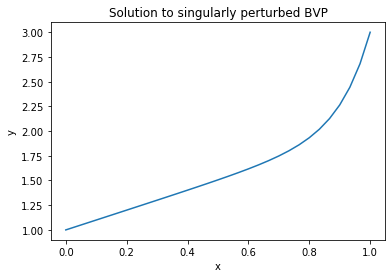

In [6]:
eps = 1/10
f = -1
a = 0
b = 1
alpha = 1
beta = 3
n = 30
h = (b-a)/30

# matrix defined in 5.9
matrix =    (eps + h/2) * np.eye(n-1,n-1,k=-1) + \
            -2*eps * np.eye(n-1,n-1) + \
            (eps - h/2) * np.eye(n-1,n-1,k=1)
# vector defined in 5.9
v = -np.ones(n-1)
v[0] = -1 - alpha*(eps + h/2)/h**2
v[-1] = -1 - beta*(eps - h/2)/h**2

# Solve for U 
U = np.linalg.solve(matrix/h**2, v)

# Add endpoints, given by alpha, beta
U = np.concatenate(([alpha],U,[beta]))
plt.plot(np.linspace(a,b,30+1),U)
plt.title("Solution to singularly perturbed BVP")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Problem 3

Visualize the $\mathcal{O}(h^2)$ convergence of this finite difference method by producing a loglog plot similar to Figure 1.2, except in the case $\epsilon=.1$. Implement a function `singular_bvp` to compute the finite difference solution to (1.7). Using $n = 5 \times 2^0,5 \times 2^1, \dots ,5 \times 2^9$ subintervals, compute 10 approximate solutions.

To produce the plot, treat the approximation with $n = 5 \times 2^9$ subintervals as the "true solution", and measure the error for the other approximations against it. Note that, since the number of subintervals for each approximation is a multiple of 2, we can compute the $L_{\infty}$ error for the $n=5 \times 2^j$ approximation by using the `step` argument in the array slicing syntax:

    # best approximation
    sol_best = singular_bvp(eps,alpha,beta,f,5*(2**9))

    # approximation with 5*(2^j) intervals
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))

    # approximation error
    error = np.max(np.abs(sol_approx - sol_best[::2**(9-j)]))


In [31]:
def singular_bvp(eps,alpha,beta,f,n):
    """Solves the singularly perturbed BVP (5.7) using finite differences."""
    a=0
    b=1
    
    h = (b-a)/n

    # matrix defined in 5.9
    matrix =    (eps + h/2) * np.eye(n-1,n-1,k=-1) + \
                -2*eps * np.eye(n-1,n-1) + \
                (eps - h/2) * np.eye(n-1,n-1,k=1)
    
    # vector defined in 5.9
    domain = np.linspace(a,b,n+1)
    
    v = np.array([f(d) for d in domain[1:-1]])
    v[0] = f(a+h) - alpha*(eps + h/2)/h**2
    v[-1] = f(b-h) - beta*(eps - h/2)/h**2

    # Solve for U 
    U = np.linalg.solve(matrix/h**2, v)

    # Add endpoints, given by alpha, beta
    U = np.concatenate(([alpha],U,[beta]))

    return U
    


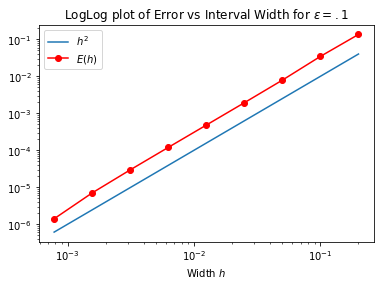

In [211]:
# Define all ns = 5*2^j for j from 0 to 9
js = np.arange(10)
ns = 5*2**js
hs = 1/ns

# define benchmark
sol_appx = [singular_bvp(.1,1,3,lambda x: x**0 * -1, n) for n in ns]
sol_best = sol_appx[-1]


# calculate error:
# print(len(sol_appx[0]), len(sol_best[0]/2**)
error = [np.max(np.abs(sol_appx[j] - sol_best[::2**(9-j)])) for j in js]

# plot errors
plt.loglog(hs[:-1], hs[:-1]**2,label="$h^2$")
plt.loglog(hs[:-1],error[:-1],'r-o',label="$E(h)$")
plt.legend()
plt.title("LogLog plot of Error vs Interval Width for $\epsilon = .1$")
plt.xlabel("Width $h$")
plt.show()


# Problem 4

Extend your finite difference code to the case of a general second order linear BVP with boundary conditions:

\begin{align*}
	&{ } a_1(x)y'' +a_2(x)y'+ a_3(x) y = f(x), \quad x \in (a,b),\\
	&{ } y(a) = \alpha, \quad y(b) = \beta.
\end{align*}

Use your code to solve the boundary value problem

\begin{align*}
	\epsilon y'' - 4(\pi - x^2)y = \cos x, \\
	y(0) = 0, \quad y(\pi/2) = 1,
\end{align*}

for $\epsilon = 0.1$ on a grid with $n=30$ subintervals.

In [192]:
def bvp(a,b,alpha,beta,a1,a2,a3,f,n):
    """Computes the solution to the BVP:
        
        a1(x)y'' + a2(x)y' + a3(x)y = f
        y(a) = α, y(b) = β
        
       using finite differences."""
    
    h = (b-a)/n

    domain = np.linspace(a,b,n+1)
    
    a1s = a1(domain)
    a2s = a2(domain)
    a3s = a3(domain)
    
    # matrix defined including u(x) term and the ai(x) factors
    h2 = h**2
    
    d1 = np.diagflat(a1s[1:-2]/h2 + a2s[1:-2]/(2*h),1)
    d0 = np.diagflat(-2*a1s[1:-1]/h2 + a3s[1:-1])
    dn1 = np.diagflat(a1s[2:-1]/h2 - a2s[2:-1]/(2*h),-1)
    
    matrix = d1 + d0 + dn1
                
    
    # vector defined in 5.9    
    v = np.array([f(d) for d in domain[1:-1]])
    v[0] = f(domain[1]) - alpha*(a1s[1]/h2 - a2s[1]/(2*h))
    v[-1] = f(domain[-2]) - beta*(a1s[-2]/h2 + a2s[-2]/(2*h))

    # Solve for U 
    U = np.linalg.solve(matrix, v)

    # Add endpoints, given by alpha, beta
    U = np.concatenate(([alpha],U,[beta]))

    return U
    
    


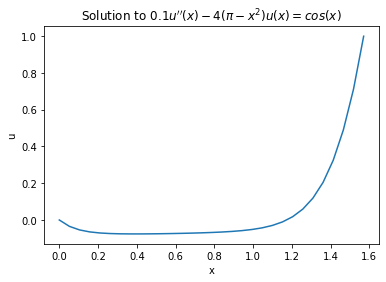

In [193]:
# Solve for the solution
a1 = lambda x:x**0 * 0.1 
a2 = lambda x:x*0
a3 = lambda x: -4*(np.pi - x**2)
f = lambda x: np.cos(x)

U = bvp(0,np.pi/2,0,1,a1,a2,a3,f,  30)

# Plot the solution
plt.plot(np.linspace(0,np.pi/2,31),U)
plt.title("Solution to $0.1u''(x)-4(\pi-x^2)u(x) = cos(x)$")
plt.xlabel("x")
plt.ylabel("u")
plt.show()

# Problem 5

Numerically solve the boundary value problem

\begin{align*}
	\epsilon y'' + xy' = -\epsilon \pi^2 \cos(\pi x) - \pi x \sin(\pi x), \\
	y(-1) = -2, \quad y(1) = 0,
\end{align*}

for $\epsilon = 0.1, 0.01,$ and $0.001$. Use a grid with $n=150$ subintervals.

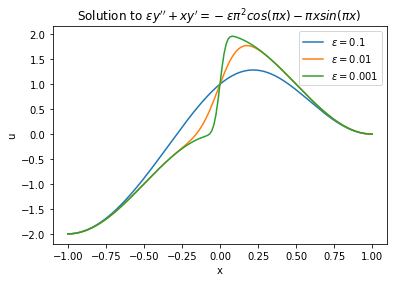

In [196]:
d = np.linspace(-1,1,151)

for e in [.1, .01, .001]:
    a1 = lambda x: x**0 * e
    a2 = lambda x: x
    a3 = lambda x: x * 0
    f = lambda x: -e * np.pi**2 * np.cos(np.pi * x) - np.pi * x * np.sin(np.pi * x)
    U = bvp(-1, 1, -2, 0, a1, a2, a3, f, 150)
    plt.plot(d,U, label="$\epsilon = "+str(e)+"$")
    
plt.title("Solution to $\epsilon y'' + xy' = -\epsilon \pi^2 cos(\pi x) - \pi x sin(\pi x)$ ")
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.show()

# Problem 6

Numerically solve the boundary value problem

\begin{align*}
	(\epsilon +x^2)y'' + 4xy' + 2y = 0, \\
	y(-1) = 1/(1+\epsilon), \quad y(1) = 1/(1+\epsilon),
\end{align*}

for $\epsilon = 0.05, 0.02$. Use a grid with $n=150$ subintervals.

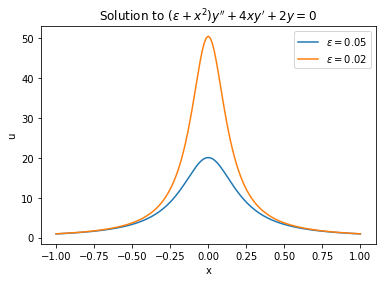

In [198]:
d = np.linspace(-1,1,151)
for e in [.05,.02]:
    a1 = lambda x: e + x**2
    a2 = lambda x: 4*x
    a3 = lambda x: x**0 * 2
    f = lambda x : x*0
    U = bvp(-1,1, 1/(1+e),1/(1+e),a1,a2,a3,f,150)
    plt.plot(d,U,label="$\epsilon = "+str(e)+"$")
    
plt.title("Solution to $ (\epsilon +x^2)y'' + 4xy' + 2y = 0 $")
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.show()